## Comparing Male vs. Female Survival Models for Probability of Marijuana Relapse

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.util import Surv
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.compare import compare_survival
import seaborn as sns
import numpy as np
from IPython.display import display_html
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [186]:
# function to display pandas dataframes in segments, side-by-side
def display_side_by_side(df, n):
    temp = int(round(len(missing_value_df) / n))
    args = []
    for i in range(n):
        if i != n-1:
            args.append(df[temp*i:temp*(i+1)].copy())
        else:
            args.append(df[temp*i:len(df)].copy())
    helper(args)

# helper function that manipulates html to print df
def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [187]:
# read csv from github url
# return pandas dataframe
url = 'https://raw.githubusercontent.com/prathikr/CS_499_Final_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv'
df = pd.read_csv(url)
df.head()

,ID,female,nonwhite,unemplmt,primsev,B2a_0,State,City,zipcode,noins,prsatx,tottxp4,TRI_0,GVS,E9a,E9b,E9c,E9d,E9e,E9e18,E9f,E9g,E9h,E9j,E9k,E9m,tsd_0,und15,CWS_0,IPI,L5,SPSy_0,RFQ33c,GSSI_0,S9y10,dldiag,press,DSS9_0,ADHDs_0,CDS_0,suicprbs_0,CJSI_0,LRI7_0,SRI7_0,ERS21_0,homeless_0,S6,PSSI_0,RERI13p_0,ncar,loc,engage30,engage42,init,S7e4_0,POPIgrp,FIS4p_0,HIVrisk,agyaddr,txtypeg,SDScrY,totttld,POS_0,AFSS_0,S2x_0,SPSm_0,E14a_0,E14b_0,EPS7p_0,SFS8p_0,SFS8p_3,SFS8p_6,SFS8p_12,ada_0,ada_3,ada_6,ada_12,S2c1_0,S2c1_3,S2c1_6,S2c1_12,S2b1_0,S2b1_3,S2b1_6,S2b1_12,S2z1_3,S2z1_6,S2z1_12,S2z2_3,S2z2_6,S2z2_12,S2z3_3,S2z3_6,S2z3_12,S2z4_3,S2z4_6,S2z4_12,S2z5_3,S2z5_6,S2z5_12,Any_Cens,Alcohol_Cens,Binge_Cens,Marijuana_Cens,Illicit_Cens,Any_Days,Alcohol_Days,Binge_Days,Marijuana_Days,Illicit_Days
0,9048,0,0,0,4,17,VA,Lynchburg,24501-1114,0,1,19,0,4,1,1,0,0,5,1,0,1,0,0,0,0,1,1,0,4,7,16,-999,6,8,1,1,7,8,7,0,100.000000,4,12,34,1,1,3,16.666667,0,4,1,1,1,0,-999,0.0,7,"2215 Langhorne Road, Suite 2-B",2,5,1021,0,5,56,0,65,0,55.396825,0.277778,-999.000000,0.000000,-999.000000,11,-999,83,-999,0,-999,0,-999,0,-999,0,-999,-999,90,-999,-999,90,-999.0,-999,90,-999,-999,90,-999,-999,90,-999,2,2,2,2,2,192,192,192,192,192
1,9152,0,0,0,1,18,VA,Lynchburg,24501-1114,0,0,21,1,8,1,1,0,1,14,1,1,1,1,1,0,0,1,1,0,6,4,0,-999,8,8,1,0,6,13,2,1,54.444444,11,18,37,0,0,3,31.111111,1,4,1,1,1,0,-999,0.0,10,"2215 Langhorne Road, Suite 2-B",2,0,1009,0,4,29,0,1,89,41.269841,0.277778,-999.000000,0.000000,-999.000000,54,-999,90,-999,0,-999,0,-999,-999,-999,0,-999,-999,90,-999,-999,90,-999.0,-999,90,-999,-999,90,-999,-999,-999,-999,2,2,2,2,2,176,176,176,176,176
2,9057,0,0,1,3,16,VA,Lynchburg,24501-1114,0,0,16,1,4,0,0,0,1,16,1,0,0,1,0,0,0,0,1,0,3,0,6,-999,9,8,1,1,2,5,4,1,0.000000,8,11,40,0,0,1,18.376068,0,4,1,1,1,0,-999,0.0,4,"2215 Langhorne Road, Suite 2-B",2,3,996,0,2,0,2,15,0,19.841270,18.611111,1.111111,0.833333,0.416667,14,86,87,89,45,0,0,1,3,2,3,0,21,87,81,21,87,90.0,-999,87,90,0,0,81,-999,-999,-999,0,0,2,0,2,21,21,365,81,365
3,9139,0,0,0,3,16,VA,Lynchburg,24501-1114,0,0,14,0,0,0,0,0,0,-999,0,0,0,0,0,0,0,0,1,0,2,1,6,-999,2,1,-999,1,1,4,2,0,100.000000,8,18,44,0,0,0,25.811966,1,4,0,1,1,0,-999,0.0,4,"2215 Langhorne Road, Suite 2-B",2,2,980,0,0,5,0,40,30,12.698413,7.638889,2.500000,1.944444,0.000000,50,84,53,90,12,3,0,0,5,0,2,0,20,1,90,-999,1,90.0,90,0,90,20,0,90,-999,0,-999,0,2,0,0,2,20,365,0,20,365
4,9051,0,1,0,3,17,VA,Lynchburg,24501-1114,0,0,12,0,0,0,0,0,0,-999,0,0,0,0,0,0,0,0,0,2,5,1,4,-999,7,8,0,1,1,7,3,0,62.222222,9,-999,33,0,0,1,24.017094,0,4,1,1,1,0,-999,25.0,0,"2215 Langhorne Road, Suite 2-B",2,2,946,0,1,0,3,4,0,30.158730,4.861111,2.222222,24.285714,14.166667,60,82,15,51,3,6,75,39,0,2,3,0,14,7,2,30,7,30.0,30,7,-999,14,7,2,-999,-999,-999,0,0,0,0,1,14,30,30,14,356


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e400860>]],
      dtype=object)

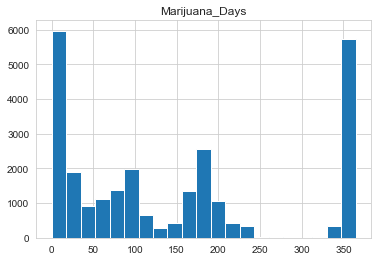

In [188]:
# remove rows without Marijuana_Days value
df = df[df.Marijuana_Days != -999] # removes all rows with Marijuana_Days = -999
df.hist(column='Marijuana_Days', bins=21) # 21 chosen so that there would be 3 bins between each x-axis number

In [189]:
# trim unnecessary columns 

print("Original df:", df.shape)

unused_potential_predictors = ['SFS8p_0', 'SFS8p_3', 'SFS8p_6', 'SFS8p_12', 'ada_0','ada_3',
'ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6','S2b1_12','S2z1_3','S2z1_6',
'S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6','S2z4_12','S2z5_3','S2z5_6',
'S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens','Any_Days','Binge_Days',
'Alcohol_Days','Illicit_Days']

# TO DO: SUM RELEVANT E9? VARIABLES BASED ON SEXUAL, EMOTIONAL, AND PHYSICAL TRAUMA
domain_expert_cols_to_drop = ['SPSy_0', 'loc', 'AFSS_0', 'E9a', 'E9b', 'E9c', 'E9d', 'E9e', 'E9e18', 'E9f', 'ID', 
'E9g', 'E9h', 'E9j', 'E9k', 'E9m', 'txtypeg', 'S7e4_0', 'engage42', 'POPIgrp','L5', 'E14a_0', 'E14b_0', 'SDScrY']

unused_labelling_columns = ['City', 'agyaddr', 'zipcode', 'State']

cols_to_drop = unused_labelling_columns + domain_expert_cols_to_drop + unused_potential_predictors

# drop columns and isolate to specific substance
df.drop(columns=cols_to_drop, inplace=True)
df = df[df.primsev == 3] # leaves only marijuana drug abusers in dataframe
df.drop(columns=['primsev'], inplace=True)
print("Updated df:", df.shape)

Original df: (26490, 110)
Updated df: (14166, 41)


In [190]:
# replace all -999 with NaN inplace
df.replace(to_replace = -999, value = np.nan, inplace=True)

# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
display_side_by_side(missing_value_df, 3)

,column_name,percent_missing
female,female,0.000000
nonwhite,nonwhite,0.035296
unemplmt,unemplmt,0.197656
B2a_0,B2a_0,0.000000
noins,noins,59.819286
prsatx,prsatx,0.268248
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.221234
GVS,GVS,0.176479
tsd_0,tsd_0,0.232952


In [191]:
print("Original df:", df.shape)

# drop columns with > 25% NaNs
df = df.loc[:, df.isnull().sum() < 0.25*df.shape[0]]
print("new df shape:", df.shape)

Original df: (14166, 41)
new df shape: (14166, 34)


In [192]:
# identify boolean columns
bool_cols = [col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]
print(bool_cols)

['female', 'nonwhite', 'unemplmt', 'prsatx', 'tsd_0', 'und15', 'dldiag', 'suicprbs_0', 'homeless_0', 'S6', 'ncar', 'engage30', 'init']


In [193]:
# replace boolean column NaNs with mode
for column in bool_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
# since boolean columns are filled we can just replace all other NaNs with mean
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)

# check to ensure entire df has no null values**
og_df_shape = df.shape
df = df.loc[:, df.isnull().sum() <= 0*df.shape[0]] # Drop columns with >0% missing values
new_df_shape = df.shape

if (og_df_shape != new_df_shape): # if any columns were dropped, we know df had null values
    print("ERROR: df contained null values")
else:
    print("no null values!")

no null values!


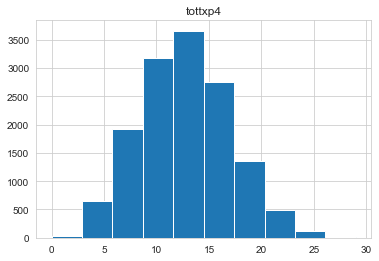

In [194]:
# normalize columns that are numerical/continuous
numerical_cols = ['tottxp4', 'CWS_0', 'ADHDs_0', 'CDS_0', 'CJSI_0', 'EPS7p_0', 'LRI7_0', 'SRI7_0', 
          'ERS21_0', 'HIVrisk', 'totttld', 'S2x_0', 'SPSm_0']

# visualize tottxp4 histogram before normalization as a sanity check
df.hist(column=numerical_cols[0])

scaler = preprocessing.StandardScaler()
for col in numerical_cols:
    df[col] = scaler.fit_transform(df[[col]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23d61860>]],
      dtype=object)

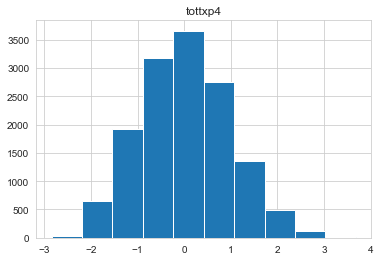

In [195]:
# visualize tottxp4 histogram after normalization as a sanity check
df.hist(column=numerical_cols[0])

In [196]:
temp_df = df['Marijuana_Days'].copy()
cens = Surv.from_arrays(temp_df < 365, temp_df.copy()) # structured array to ensure censoring of 365 value
compare_survival(cens, df['female'].copy(), return_stats=True)

(6.3895590308388375,
 0.011479354206487812,
        counts  observed      expected   statistic
 group                                            
 0       11227     10208  10091.724176  116.275824
 1        2939      2656   2772.275824 -116.275824,
 array([[ 2115.96249549, -2115.96249549],
        [-2115.96249549,  2115.96249549]]))

In [197]:
# segment data into training and test sets
X_tr, X_te = train_test_split(df, test_size=0.2)

print("Training Data Shape:", X_tr.shape)
print("Testing Data Shape:", X_te.shape)

Training Data Shape: (11332, 34)
Testing Data Shape: (2834, 34)


In [198]:
# extract Marijuana_Days predictor from training set
Y_tr = X_tr['Marijuana_Days'].copy()
X_tr.drop(columns=['Marijuana_Days'], inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [199]:
# generate overall model with training data
Y_tr_censored = Surv.from_arrays(Y_tr < 365, Y_tr.copy()) # structured array to ensure censoring of 365 value
model = CoxPHSurvivalAnalysis()
model.fit(X_tr, Y_tr_censored)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, ties='breslow', tol=1e-09, verbose=0)

In [200]:
# extract subgroups from test set
X_m_te = X_te[X_te.female == 0].copy()
Y_m_te = X_m_te['Marijuana_Days'].copy()
X_m_te.drop(columns=['Marijuana_Days'], inplace=True)

X_f_te = X_te[X_te.female == 1].copy()
Y_f_te = X_f_te['Marijuana_Days'].copy()
X_f_te.drop(columns=['Marijuana_Days'], inplace=True)

print('Male testing data shape:', X_m_te.shape)
print('Female testing data shape:', X_f_te.shape)

Male testing data shape: (2259, 33)
Female testing data shape: (575, 33)


In [201]:
# predict on male test data
pred_surv_m = model.predict_survival_function(X_m_te)
pred_haz_m = model.predict_cumulative_hazard_function(X_m_te)
Y_m_te_censored = Surv.from_arrays(Y_m_te < 365, Y_m_te.copy()) # structured array to ensure censoring of 365 value
score_m = model.score(X_m_te, Y_m_te_censored)

In [202]:
# predict on female test data
pred_surv_f = model.predict_survival_function(X_f_te)
pred_haz_f = model.predict_cumulative_hazard_function(X_f_te)
Y_f_te_censored = Surv.from_arrays(Y_f_te < 365, Y_f_te.copy()) # structured array to ensure censoring of 365 value
score_f = model.score(X_f_te, Y_f_te_censored)

In [209]:
np.mean([person.y for person in pred_haz_m], axis=0)

array([0.09498532, 0.1815437 , 0.22950509, 0.2657379 , 0.28551968,
       0.31737575, 0.32339895, 0.38694317, 0.39480123, 0.39950838,
       0.43038234, 0.43383589, 0.43920436, 0.44285548, 0.50213379,
       0.51872303, 0.52075314, 0.52537364, 0.52908277, 0.53019858,
       0.55178679, 0.58355507, 0.58684659, 0.59034055, 0.59326077,
       0.60282074, 0.60616223, 0.60911795, 0.61603019, 0.61801524,
       0.6993173 , 0.70290933, 0.7069345 , 0.70948454, 0.71246545,
       0.72228046, 0.72550526, 0.73046157, 0.73305659, 0.73544016,
       0.74911215, 0.75240017, 0.75679479, 0.75833815, 0.76120839,
       0.78554821, 0.78757525, 0.78983047, 0.79321932, 0.79593697,
       0.80978242, 0.81230469, 0.81391334, 0.81736442, 0.81920919,
       0.82313492, 0.8266085 , 0.82916244, 0.83241857, 0.83521661,
       0.89759453, 0.90223766, 0.90665127, 0.91058775, 0.91453633,
       0.92319706, 0.92717856, 0.93142187, 0.93542709, 0.93944321,
       0.95480108, 0.95887398, 0.96193701, 0.96398378, 0.96757

In [204]:
np.mean([person.y for person in pred_haz_f], axis=0)

array([0.09498532, 0.1815437 , 0.22950509, 0.2657379 , 0.28551968,
       0.31737575, 0.32339895, 0.38694317, 0.39480123, 0.39950838,
       0.43038234, 0.43383589, 0.43920436, 0.44285548, 0.50213379,
       0.51872303, 0.52075314, 0.52537364, 0.52908277, 0.53019858,
       0.55178679, 0.58355507, 0.58684659, 0.59034055, 0.59326077,
       0.60282074, 0.60616223, 0.60911795, 0.61603019, 0.61801524,
       0.6993173 , 0.70290933, 0.7069345 , 0.70948454, 0.71246545,
       0.72228046, 0.72550526, 0.73046157, 0.73305659, 0.73544016,
       0.74911215, 0.75240017, 0.75679479, 0.75833815, 0.76120839,
       0.78554821, 0.78757525, 0.78983047, 0.79321932, 0.79593697,
       0.80978242, 0.81230469, 0.81391334, 0.81736442, 0.81920919,
       0.82313492, 0.8266085 , 0.82916244, 0.83241857, 0.83521661,
       0.89759453, 0.90223766, 0.90665127, 0.91058775, 0.91453633,
       0.92319706, 0.92717856, 0.93142187, 0.93542709, 0.93944321,
       0.95480108, 0.95887398, 0.96193701, 0.96398378, 0.96757

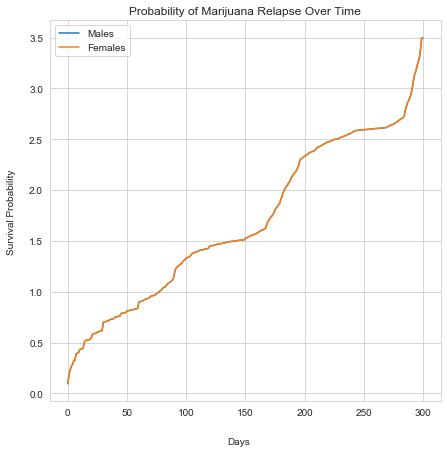

In [205]:
# display hazard plots side-by-side for comparison
"""fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(7,7))
ax.set_title('Risk of Marijuana Relapse Over Time')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Risk of Relapse', va='center', rotation='vertical')
ax.plot(np.mean([person.y for person in pred_haz_m], axis=0), label="Males")
ax.plot(np.mean([person.y for person in pred_haz_f], axis=0), label="Females")
ax.legend()"""
# display survival plots side-by-side for comparison
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(7,7))
ax.set_title('Probability of Marijuana Relapse Over Time')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Survival Probability', va='center', rotation='vertical')
ax.plot(np.mean([person.y for person in pred_haz_m], axis=0), label="Males")
ax.plot(np.mean([person.y for person in pred_haz_f], axis=0), label="Females")
ax.legend()

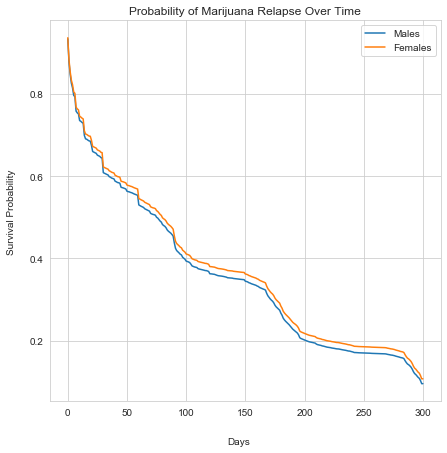

In [206]:
# display survival plots side-by-side for comparison
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(7,7))
ax.set_title('Probability of Marijuana Relapse Over Time')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Survival Probability', va='center', rotation='vertical')
ax.plot(np.mean([person.y for person in pred_surv_m], axis=0), label="Males")
ax.plot(np.mean([person.y for person in pred_surv_f], axis=0), label="Females")
ax.legend()

In [207]:
# display feature importance
coefs = pd.DataFrame({'Coefficient':X_tr.columns, 'Weight':model.coef_})
coefs.sort_values('Weight', inplace=True, ascending=False)
display_side_by_side(coefs, 4)

,Coefficient,Weight
31,SPSm_0,0.129622
27,HIVrisk,0.118903
21,ERS21_0,0.088810
9,und15,0.070425
4,prsatx,0.063571
13,dldiag,0.032383
6,TRI_0,0.032015
1,nonwhite,0.024380
15,ADHDs_0,0.023185
32,EPS7p_0,0.013323
